In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read VGG16 results data
results_path = "./../results/vgg16/results.csv"
results_df = pd.read_csv(results_path, sep = ";")

In [3]:
results_df.shape

(54, 30)

In [4]:
results_df.head()

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,training_time,train_loss_last_epoch,train_loss_avg5,train_loss_avg10,...,test_sparse_categorical_accuracy,true_3_pred_3,true_3_pred_5,true_3_pred_7,true_5_pred_3,true_5_pred_5,true_5_pred_7,true_7_pred_3,true_7_pred_5,true_7_pred_7
0,v1,90,64,32,16,16,97.293156,0.038325,0.042282,0.046802,...,0.992593,90,0,0,0,90,0,0,2,88
1,v1,90,64,32,256,256,102.302117,0.004976,0.005383,0.005956,...,0.992593,90,0,0,0,90,0,0,2,88
2,v1,90,64,32,4096,4096,133.971879,0.000311,0.000368,0.000451,...,0.992593,90,0,0,0,90,0,0,2,88
3,v1,90,128,32,16,16,372.864259,0.010527,0.011262,0.012402,...,1.000000,90,0,0,0,90,0,0,0,90
4,v1,90,128,32,256,256,386.086895,0.000350,0.000376,0.000404,...,0.996296,90,0,0,0,90,0,0,1,89


---

### Initial analysis

In [5]:
# Base statistics - table
results_df.iloc[:, 6:].describe()

,training_time,train_loss_last_epoch,train_loss_avg5,train_loss_avg10,train_sparse_categorical_accuracy_last_epoch,train_sparse_categorical_accuracy_avg5,train_sparse_categorical_accuracy_avg10,val_loss_last_epoch,val_loss_avg5,val_loss_avg10,...,test_sparse_categorical_accuracy,true_3_pred_3,true_3_pred_5,true_3_pred_7,true_5_pred_3,true_5_pred_5,true_5_pred_7,true_7_pred_3,true_7_pred_5,true_7_pred_7
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000
mean,3046.498088,0.069106,0.069795,0.070601,0.963872,0.963803,0.963777,0.073980,0.074805,0.075718,...,0.960768,86.555556,0.092593,3.351852,0.055556,84.870370,5.074074,0.0,2.018519,87.981481
std,4405.262634,0.230545,0.230926,0.231389,0.137193,0.137175,0.137210,0.237313,0.237937,0.238574,...,0.139324,17.139458,0.401343,17.153202,0.408248,20.782836,20.792644,0.0,12.215812,12.215812
min,97.016058,0.000000,0.000000,0.000000,0.341667,0.341667,0.341667,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,386.236710,0.000001,0.000001,0.000002,1.000000,1.000000,1.000000,0.000016,0.000017,0.000018,...,0.996296,90.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.0,0.000000,89.000000
50%,1239.854445,0.000049,0.000058,0.000070,1.000000,1.000000,1.000000,0.000235,0.000272,0.000288,...,1.000000,90.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.0,0.000000,90.000000
75%,3880.498335,0.000869,0.001000,0.001349,1.000000,1.000000,1.000000,0.002152,0.001901,0.002107,...,1.000000,90.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.0,1.000000,90.000000
max,15994.862591,1.098569,1.098597,1.098586,1.000000,1.000000,1.000000,1.100174,1.100246,1.100235,...,1.000000,90.000000,2.000000,90.000000,3.000000,90.000000,90.000000,0.0,90.000000,90.000000


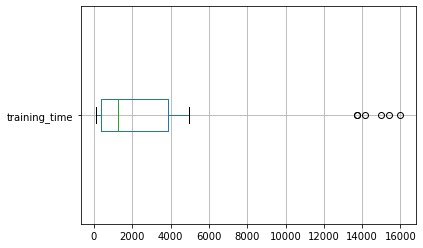

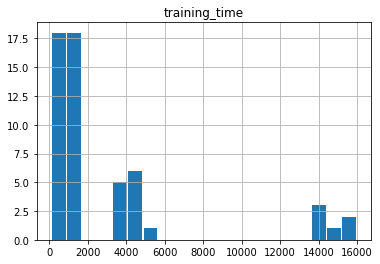

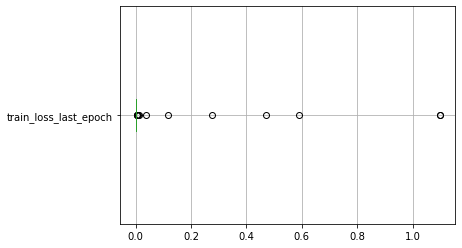

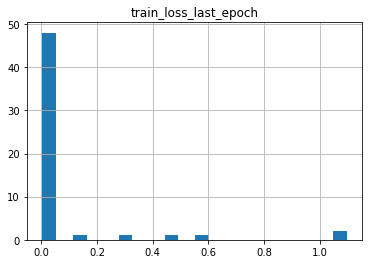

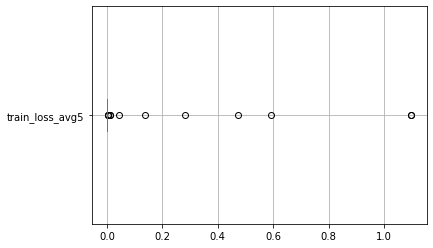

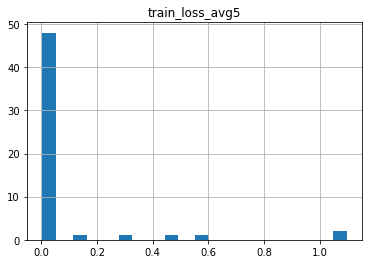

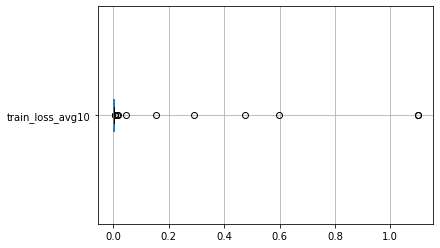

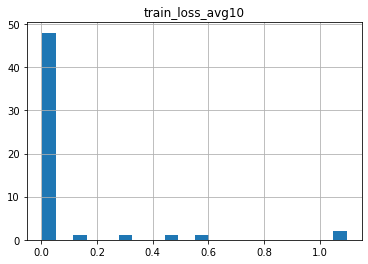

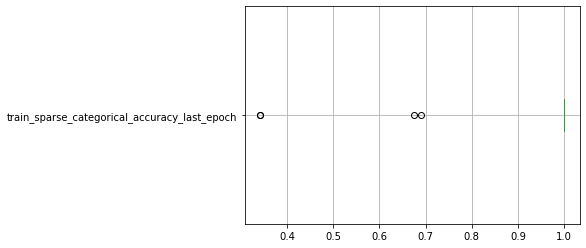

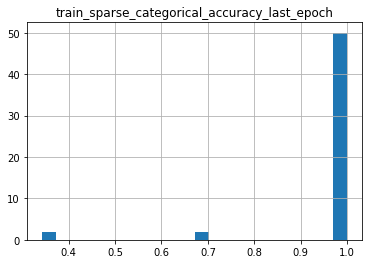

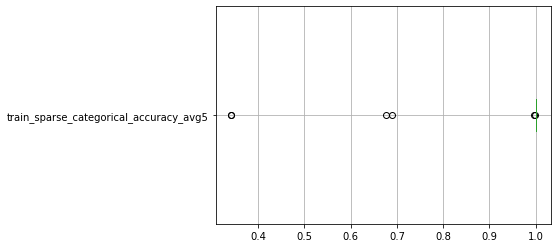

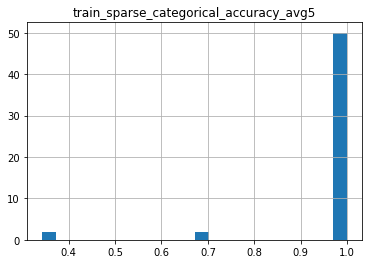

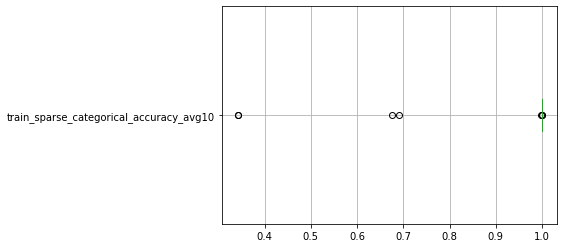

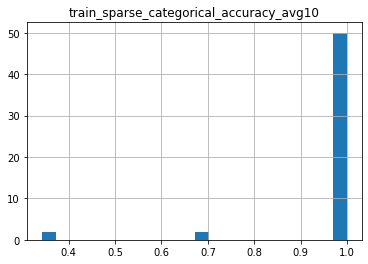

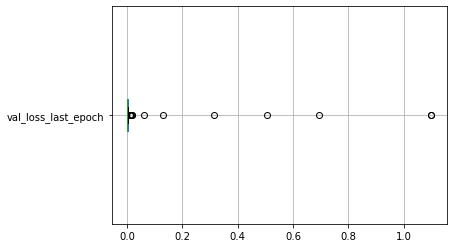

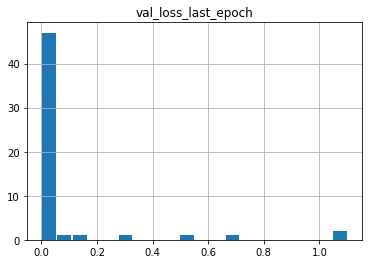

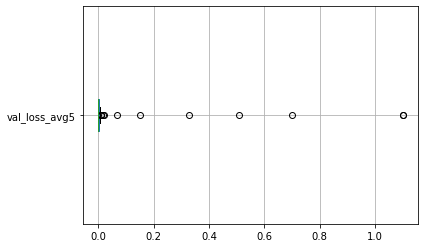

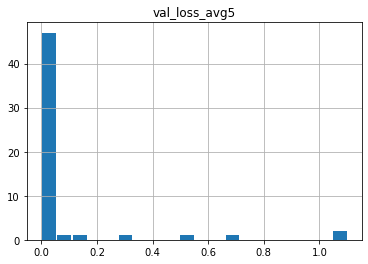

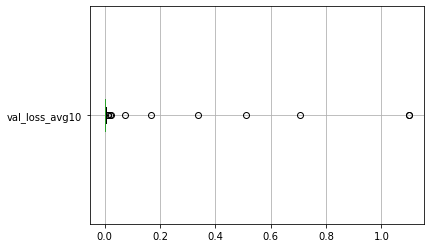

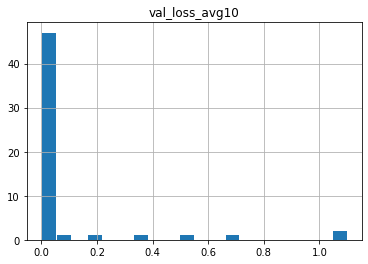

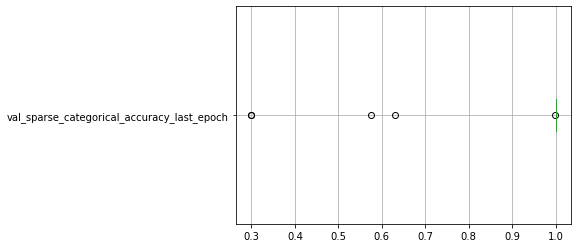

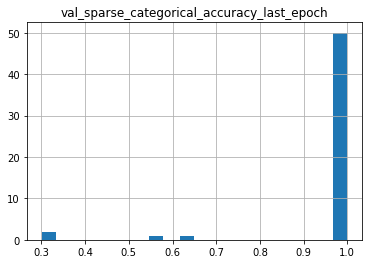

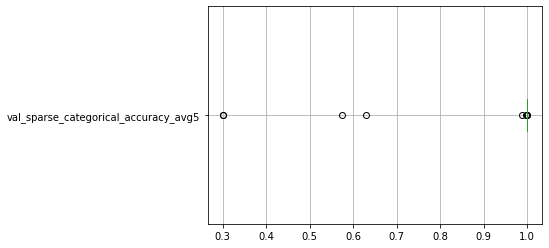

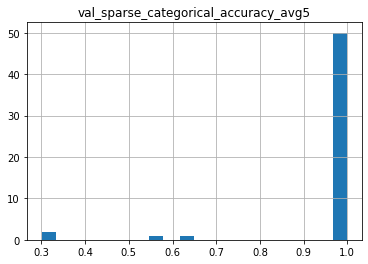

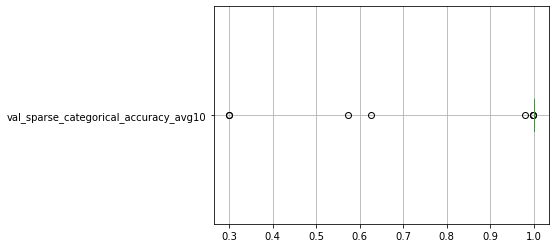

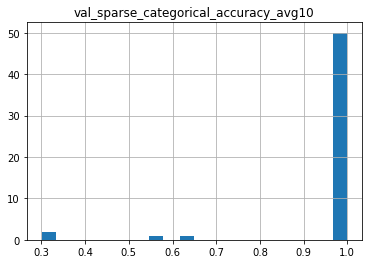

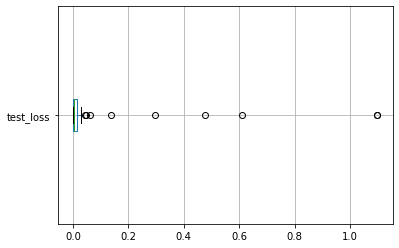

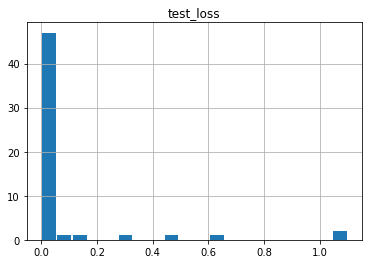

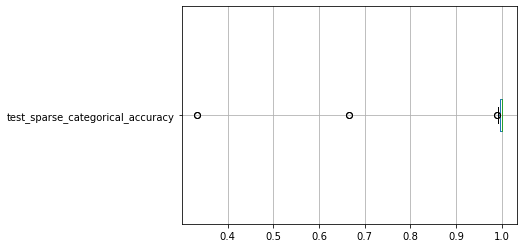

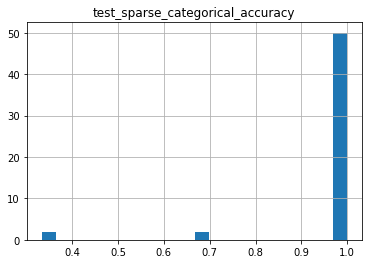

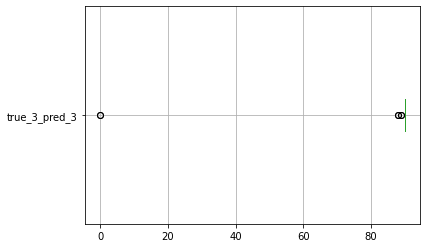

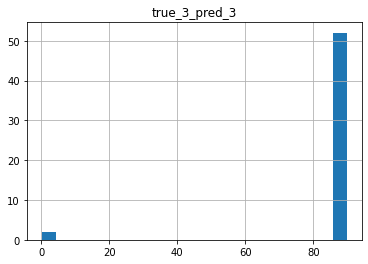

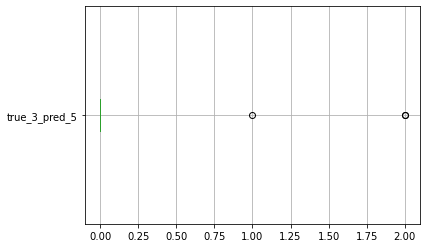

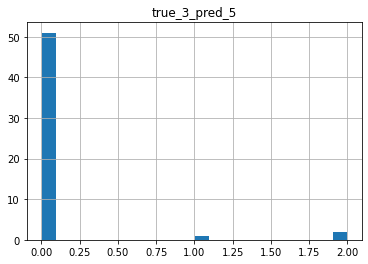

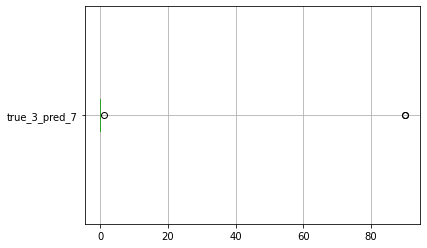

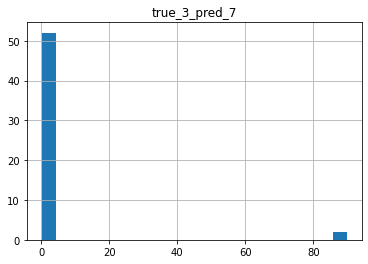

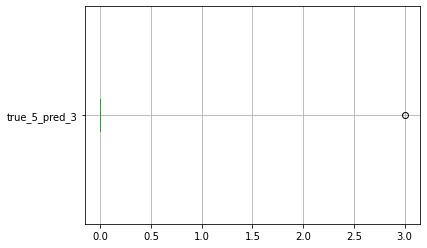

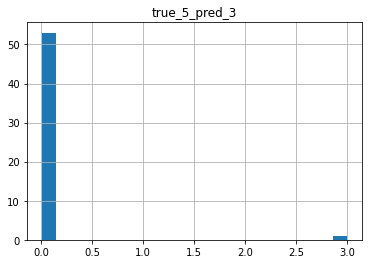

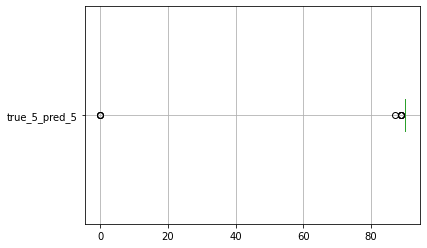

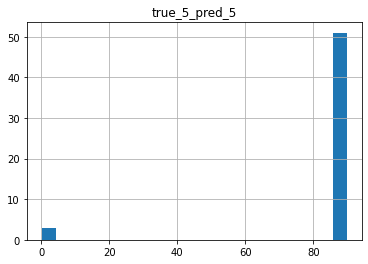

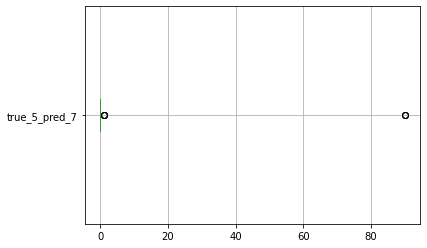

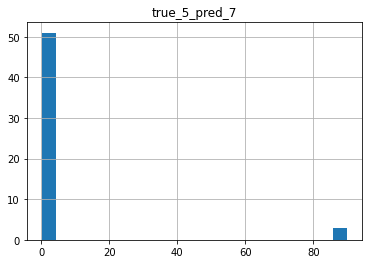

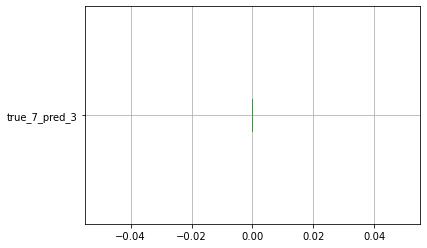

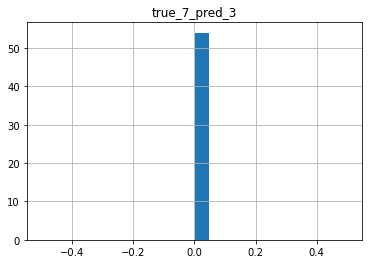

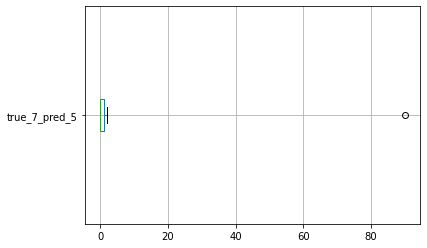

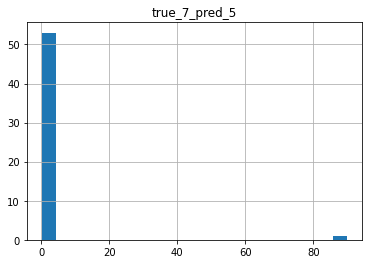

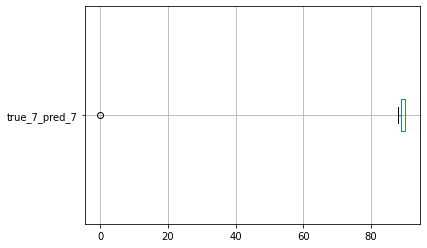

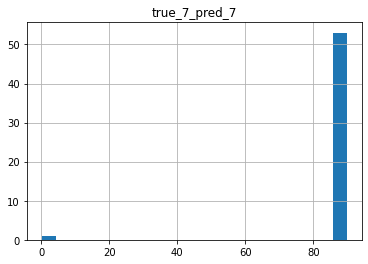

In [6]:
# Base statistics - boxplots, histograms
for col in list(results_df.columns[6:]):
  results_df[[col]].boxplot(vert = False)
  plt.show()
  results_df[[col]].hist(bins = 20, rwidth = 0.9)
  plt.show()

---

### Training time analysis

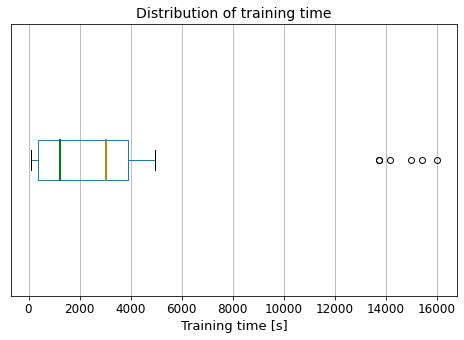

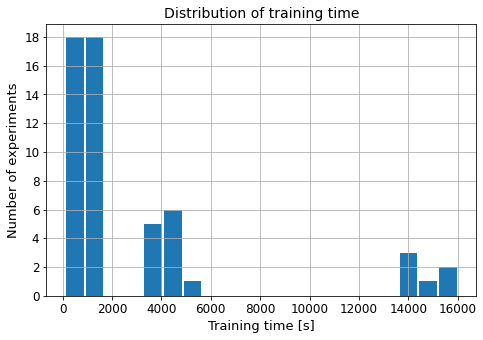

In [7]:
# Prepare boxplot and histogram for training time

col = "training_time"
plots_dir = "./../results/vgg16/plots/"

meanprops_dict = dict(linestyle = "-", linewidth = 2, color = "darkgoldenrod")
medianprops_dict = dict(linewidth = 2, color = "green")

plt.figure(figsize = (8, 5))
results_df[[col]].boxplot(vert = False, medianprops = medianprops_dict, showmeans = True, meanline = True, meanprops = meanprops_dict)
plt.xticks(size = 12)
plt.yticks([])
plt.title("Distribution of training time", size = 14)
plt.xlabel("Training time [s]", size = 13)
plt.savefig(f"{plots_dir}train_time_boxplot.pdf")
plt.show()

fig = plt.figure(figsize = (7.7, 5))
ax = fig.gca()
results_df[[col]].hist(bins = 20, rwidth = 0.9, ax = ax)
plt.xticks(size = 12)
plt.yticks(np.arange(0, 19, 2), size = 12)
plt.title("Distribution of training time", size = 14)
plt.xlabel("Training time [s]", size = 13)
plt.ylabel("Number of experiments", size = 13)
plt.savefig(f"{plots_dir}train_time_hist.pdf")
plt.show()

In [8]:
# All training time
all_training_time = results_df[["training_time"]].sum()[0]/3600
print("All training time took about", "{0:02.0f}h {1:02.0f}min".format(*divmod(all_training_time * 60, 60)), ".")

All training time took about 45h 42min .


In [9]:
results_df["training_time"].describe()

count       54.000000
mean      3046.498088
std       4405.262634
min         97.016058
25%        386.236710
50%       1239.854445
75%       3880.498335
max      15994.862591
Name: training_time, dtype: float64

In [10]:
results_df.sort_values(by = "training_time", ascending = False).reset_index(drop = True)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,training_time,train_loss_last_epoch,train_loss_avg5,train_loss_avg10,...,test_sparse_categorical_accuracy,true_3_pred_3,true_3_pred_5,true_3_pred_7,true_5_pred_3,true_5_pred_5,true_5_pred_7,true_7_pred_3,true_7_pred_5,true_7_pred_7
0,v1,900,256,32,4096,4096,15994.862591,4.922834e-08,5.420631e-08,6.334539e-08,...,1.000000,90,0,0,0,90,0,0,0,90
1,v2,900,256,32,4096,4096,15410.883714,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,90,0,0,0,90,0,0,0,90
2,v1,900,256,32,256,256,14970.488415,5.866590e-08,6.035466e-08,6.242422e-08,...,1.000000,90,0,0,0,90,0,0,0,90
3,v1,900,256,32,16,16,14151.817174,1.098560e+00,1.098583e+00,1.098572e+00,...,0.333333,0,0,90,0,0,90,0,0,90
4,v2,900,256,32,16,16,13748.280980,2.919172e-06,3.323574e-06,3.839713e-06,...,1.000000,90,0,0,0,90,0,0,0,90
5,v2,900,256,32,256,256,13724.450014,2.086608e-07,2.133074e-07,2.199294e-07,...,1.000000,90,0,0,0,90,0,0,0,90
6,v2,270,256,32,4096,4096,4943.101046,3.679299e-10,3.679299e-10,3.679299e-10,...,1.000000,90,0,0,0,90,0,0,0,90
7,v1,270,256,32,4096,4096,4534.017548,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,90,0,0,0,90,0,0,0,90
8,v2,270,256,32,256,256,4486.241277,2.341736e-07,2.499557e-07,2.744194e-07,...,1.000000,90,0,0,0,90,0,0,0,90
9,v2,270,256,32,16,16,4355.140838,1.181076e-01,1.357034e-01,1.523583e-01,...,0.988889,90,0,0,0,89,1,0,2,88


---

### Best models

In [11]:
# Best models based on test accuracy, val accuracy (last epoch) and train accuracy (last epoch)
sort_cols = ["test_sparse_categorical_accuracy", "val_sparse_categorical_accuracy_last_epoch", "train_sparse_categorical_accuracy_last_epoch"]
results_df.loc[:, list(results_df.columns[0:6]) + sort_cols].sort_values(by = sort_cols, ascending = False).reset_index(drop = True)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,test_sparse_categorical_accuracy,val_sparse_categorical_accuracy_last_epoch,train_sparse_categorical_accuracy_last_epoch
0,v1,90,128,32,16,16,1.000000,1.000000,1.000000
1,v1,90,256,32,4096,4096,1.000000,1.000000,1.000000
2,v1,270,64,32,16,16,1.000000,1.000000,1.000000
3,v1,270,128,32,16,16,1.000000,1.000000,1.000000
4,v1,270,128,32,256,256,1.000000,1.000000,1.000000
5,v1,270,128,32,4096,4096,1.000000,1.000000,1.000000
6,v1,270,256,32,256,256,1.000000,1.000000,1.000000
7,v1,270,256,32,4096,4096,1.000000,1.000000,1.000000
8,v1,900,128,32,256,256,1.000000,1.000000,1.000000
9,v1,900,128,32,4096,4096,1.000000,1.000000,1.000000


In [12]:
# Best models based on test accuracy, val accuracy (last epoch) and train accuracy (last epoch)
sort_cols = ["test_sparse_categorical_accuracy", "val_sparse_categorical_accuracy_last_epoch", "train_sparse_categorical_accuracy_last_epoch"]
results_df.loc[:, [col for col in results_df.columns if not (col.startswith("true") or "loss" in col or "time" in col)]].sort_values(by = sort_cols, ascending = False).reset_index(drop = True)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,train_sparse_categorical_accuracy_last_epoch,train_sparse_categorical_accuracy_avg5,train_sparse_categorical_accuracy_avg10,val_sparse_categorical_accuracy_last_epoch,val_sparse_categorical_accuracy_avg5,val_sparse_categorical_accuracy_avg10,test_sparse_categorical_accuracy
0,v1,90,128,32,16,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,v1,90,256,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,v1,270,64,32,16,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,v1,270,128,32,16,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,v1,270,128,32,256,256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,v1,270,128,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,v1,270,256,32,256,256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,v1,270,256,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,v1,900,128,32,256,256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,v1,900,128,32,4096,4096,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

### Confusion matrices analysis

In [13]:
conf_matrix_series = results_df.loc[:, [col for col in results_df.columns if col.startswith("true")]].sum()
conf_matrix_series

true_3_pred_3    4674
true_3_pred_5       5
true_3_pred_7     181
true_5_pred_3       3
true_5_pred_5    4583
true_5_pred_7     274
true_7_pred_3       0
true_7_pred_5     109
true_7_pred_7    4751
dtype: int64

In [14]:
def prepare_labels(prefix):
    return [f"{prefix}_{x}" for x in [3, 5, 7]]

In [15]:
conf_matrix_vals = np.array(conf_matrix_series)
conf_matrix = conf_matrix_vals.reshape([3, 3])
conf_matrix_df = pd.DataFrame(conf_matrix, index = prepare_labels("true"), columns = prepare_labels("pred"))
conf_matrix_df

,pred_3,pred_5,pred_7
true_3,4674,5,181
true_5,3,4583,274
true_7,0,109,4751


In [16]:
## Percentage

# 54 - number of trained ConvNets
# 90 - number of images in each class in test data

conf_matrix_perc_df = conf_matrix_df / (54 * 90)
conf_matrix_perc_df

,pred_3,pred_5,pred_7
true_3,0.961728,0.001029,0.037243
true_5,0.000617,0.943004,0.056379
true_7,0.000000,0.022428,0.977572


In [17]:
sort_cols = ["true_7_pred_5", "true_5_pred_7", "true_3_pred_7"]
results_df.loc[:, list(results_df.columns[0:6]) + sort_cols].sort_values(by = sort_cols, ascending = False)

,generator_type,images_per_class_num,images_size,batch_size,fc1,fc2,true_7_pred_5,true_5_pred_7,true_3_pred_7
15,v1,270,256,32,16,16,90,0,0
42,v2,270,256,32,16,16,2,1,0
0,v1,90,64,32,16,16,2,0,0
1,v1,90,64,32,256,256,2,0,0
2,v1,90,64,32,4096,4096,2,0,0
5,v1,90,128,32,4096,4096,2,0,0
27,v2,90,64,32,16,16,1,0,1
4,v1,90,128,32,256,256,1,0,0
7,v1,90,256,32,256,256,1,0,0
10,v1,270,64,32,256,256,1,0,0


In [18]:
# Filter out weird cases
results_sub_df = results_df[~((results_df["true_7_pred_5"] == 90) | (results_df["true_5_pred_7"] == 90) | (results_df["true_3_pred_7"] == 90))].copy()
conf_matrix_series2 = results_sub_df.loc[:, [col for col in results_sub_df.columns if col.startswith("true")]].sum()
conf_matrix_vals2 = np.array(conf_matrix_series2)
conf_matrix2 = conf_matrix_vals2.reshape([3, 3])
conf_matrix_df2 = pd.DataFrame(conf_matrix2, index = prepare_labels("true"), columns = prepare_labels("pred"))
conf_matrix_df2

,pred_3,pred_5,pred_7
true_3,4494,5,1
true_5,3,4493,4
true_7,0,19,4481


---